In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from datetime import datetime as dt

#-----------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#----------------------------------------------------

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#----------------------------------------------------

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#----------------------------------------------------

Using TensorFlow backend.


<Figure size 360x360 with 0 Axes>

In [2]:
df = pd.read_csv('data.csv')
df.shape

(569, 33)

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
import pandas_profiling as pp
pp.ProfileReport(df)

Number of variables,33
Number of observations,569
Total Missing (%),3.0%
Total size in memory,146.8 KiB
Average record size in memory,264.2 B
Numeric,21
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,11


In [5]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
sum(df.duplicated())

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

B    357
M    212
Name: diagnosis, dtype: int64


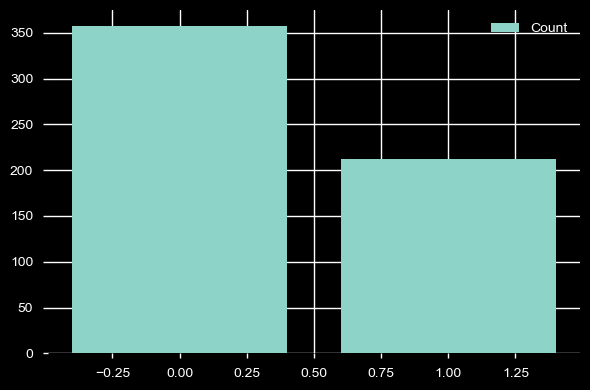

In [11]:
B, M = df['diagnosis'].value_counts()
s = [B,M]
print(df['diagnosis'].value_counts())
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar([0,1], s,align='center',
            label='Count')
    plt.ylabel('')
    plt.xlabel('')
    plt.legend(loc='best')
    plt.tight_layout()

In [12]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [13]:
df.loc[Outliers_to_drop]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,B,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,B,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,...,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,B,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,...,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [14]:
#Encoding Male and Female to 1 and 0
df['diagnosis']=df['diagnosis'].map({'M':int('1'),'B':int('0')})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
x = df.iloc[:,1:32] 
y = df.iloc[:,0] 

print("X: {}".format(x.shape))
print("Y: {}".format(y.shape))

X: (569, 30)
Y: (569,)


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [17]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)

In [19]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [20]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [21]:
featureScores

,Specs,Score
0,radius_mean,646.981021
1,texture_mean,118.096059
2,perimeter_mean,697.235272
3,area_mean,573.060747
4,smoothness_mean,83.651123
5,compactness_mean,313.233079
6,concavity_mean,533.793126
7,concave points_mean,861.676020
8,symmetry_mean,69.527444
9,fractal_dimension_mean,0.093459


In [22]:
print(featureScores.nlargest(20,'Score'))


                   Specs       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880
28        symmetry_worst  118.860232
1           texture_mean  118.096059
17     concave points_se  113.262760


In [23]:
df.drop(['smoothness_mean','symmetry_mean','fractal_dimension_worst','compactness_se','concavity_se',
         'fractal_dimension_se','smoothness_se','fractal_dimension_mean','texture_se','symmetry_se' ], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
diagnosis               569 non-null int64
radius_mean             569 non-null float64
texture_mean            569 non-null float64
perimeter_mean          569 non-null float64
area_mean               569 non-null float64
compactness_mean        569 non-null float64
concavity_mean          569 non-null float64
concave points_mean     569 non-null float64
radius_se               569 non-null float64
perimeter_se            569 non-null float64
area_se                 569 non-null float64
concave points_se       569 non-null float64
radius_worst            569 non-null float64
texture_worst           569 non-null float64
perimeter_worst         569 non-null float64
area_worst              569 non-null float64
smoothness_worst        569 non-null float64
compactness_worst       569 non-null float64
concavity_worst         569 non-null float64
concave points_worst    569 non-null float

In [25]:
X = df.iloc[:,1:21].values
Y= df.iloc[:,0].values

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (569, 20)
Y: (569,)


In [26]:
X

array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.175,
                                                    random_state = 0)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (469, 20)
X_test: (100, 20)
Y_train: (469,)
Y_test: (100,)


In [28]:

st=dt.now()
logits = LogisticRegression(solver = 'liblinear')
logits.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

pred_logits = logits.predict(X_test)

#Model Evaluation
logits_acc = accuracy_score(Y_test, pred_logits)
print('Accuracy Score: ' + str(logits_acc))

print('Precision Score: ' + str(precision_score(Y_test, pred_logits)))

print('Recall Score: ' + str(recall_score(Y_test, pred_logits)))

print('F1 Score: ' + str(f1_score(Y_test, pred_logits)))

print('Classification Report: \n' + str(classification_report(Y_test, pred_logits)))

Time taken to complete random search:  0:00:00.178347
Accuracy Score: 0.95
Precision Score: 0.9090909090909091
Recall Score: 0.975609756097561
F1 Score: 0.9411764705882352
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.91      0.98      0.94        41

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



st=dt.now()
logits = LogisticRegression(solver = 'liblinear')
logits.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

pred_logits = logits.predict(X_test)

#Model Evaluation
logits_acc = accuracy_score(Y_test, pred_logits)
print('Accuracy Score: ' + str(logits_acc))

print('Precision Score: ' + str(precision_score(Y_test, pred_logits)))

print('Recall Score: ' + str(recall_score(Y_test, pred_logits)))

print('F1 Score: ' + str(f1_score(Y_test, pred_logits)))

print('Classification Report: \n' + str(classification_report(Y_test, pred_logits)))

KNeighborsClassifier

In [29]:
st=dt.now()
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)


knn_pred = knn.predict(X_test)

#Model Evaluation
kacc = accuracy_score(Y_test, knn_pred)
print('Accuracy Score: ' + str(kacc))

print('Precision Score: ' + str(precision_score(Y_test, knn_pred)))

print('Recall Score: ' + str(recall_score(Y_test, knn_pred)))

print('F1 Score: ' + str(f1_score(Y_test, knn_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, knn_pred)))

Time taken to complete random search:  0:00:00.003000
Accuracy Score: 0.96
Precision Score: 0.9743589743589743
Recall Score: 0.926829268292683
F1 Score: 0.9500000000000001
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.97      0.93      0.95        41

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



In [30]:
st=dt.now()
l_svc = SVC(kernel = 'linear')
l_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

l_pred = l_svc.predict(X_test)

#Model Evaluation
lsvcacc = accuracy_score(Y_test, l_pred)
print('Accuracy Score: ' + str(lsvcacc))

print('Precision Score: ' + str(precision_score(Y_test, l_pred)))

print('Recall Score: ' + str(recall_score(Y_test, l_pred)))

print('F1 Score: ' + str(f1_score(Y_test, l_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, l_pred)))

Time taken to complete random search:  0:00:01.404213
Accuracy Score: 0.94
Precision Score: 0.8888888888888888
Recall Score: 0.975609756097561
F1 Score: 0.9302325581395349
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.89      0.98      0.93        41

    accuracy                           0.94       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



Liner Support Vector Classifier

In [31]:
st=dt.now()
l_svc = SVC(kernel = 'linear')
l_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

l_pred = l_svc.predict(X_test)

#Model Evaluation
lsvcacc = accuracy_score(Y_test, l_pred)
print('Accuracy Score: ' + str(lsvcacc))

print('Precision Score: ' + str(precision_score(Y_test, l_pred)))

print('Recall Score: ' + str(recall_score(Y_test, l_pred)))

print('F1 Score: ' + str(f1_score(Y_test, l_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, l_pred)))

Time taken to complete random search:  0:00:01.535555
Accuracy Score: 0.94
Precision Score: 0.8888888888888888
Recall Score: 0.975609756097561
F1 Score: 0.9302325581395349
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.89      0.98      0.93        41

    accuracy                           0.94       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



In [32]:
st=dt.now()
gk_svc = SVC(kernel = 'rbf')
gk_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

gk_pred = gk_svc.predict(X_test)

#Model Evaluation
ksvcaccacc = accuracy_score(Y_test, gk_pred)
print('Accuracy Score: ' + str(ksvcaccacc))

print('Precision Score: ' + str(precision_score(Y_test, gk_pred)))

print('Recall Score: ' + str(recall_score(Y_test, gk_pred)))

print('F1 Score: ' + str(f1_score(Y_test, gk_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, gk_pred)))

Time taken to complete random search:  0:00:00.039985
Accuracy Score: 0.59
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        59
           1       0.00      0.00      0.00        41

    accuracy                           0.59       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.35      0.59      0.44       100



In [33]:
st=dt.now()
randomforest = RandomForestClassifier(n_estimators = 100, 
                                      random_state = 0)
randomforest.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

random_pred = randomforest.predict(X_test)

#Model Evaluation
rmacc = accuracy_score(Y_test, random_pred)
print('Accuracy Score: ' + str(rmacc))

print('Precision Score: ' + str(precision_score(Y_test, random_pred)))

print('Recall Score: ' + str(recall_score(Y_test, random_pred)))

print('F1 Score: ' + str(f1_score(Y_test, random_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, random_pred)))

Time taken to complete random search:  0:00:00.170806
Accuracy Score: 0.97
Precision Score: 0.975
Recall Score: 0.9512195121951219
F1 Score: 0.9629629629629629
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.97      0.95      0.96        41

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [34]:
st=dt.now()
decison = DecisionTreeClassifier(criterion = 'entropy', 
                                 random_state = 0)
decison.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

decison_pred = decison.predict(X_test)

#Model Evaluation
dtacc = accuracy_score(Y_test, decison_pred)
print('Accuracy Score: ' + str(dtacc))

print('Precision Score: ' + str(precision_score(Y_test, decison_pred)))

print('Recall Score: ' + str(recall_score(Y_test, decison_pred)))

print('F1 Score: ' + str(f1_score(Y_test, decison_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, decison_pred)))

Time taken to complete random search:  0:00:00.008975
Accuracy Score: 0.95
Precision Score: 0.9090909090909091
Recall Score: 0.975609756097561
F1 Score: 0.9411764705882352
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.91      0.98      0.94        41

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [35]:
st=dt.now()
bernb = BernoulliNB()
bernb.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

bernb_predict = bernb.predict(X_test)

#Model Evaluation
bncacc = accuracy_score(Y_test, bernb_predict)
print('Accuracy Score: ' + str(bncacc))

print('Precision Score: ' + str(precision_score(Y_test, bernb_predict)))

print('Recall Score: ' + str(recall_score(Y_test, bernb_predict)))

print('F1 Score: ' + str(f1_score(Y_test, bernb_predict)))

print('Classification Report: \n' + str(classification_report(Y_test, bernb_predict)))

Time taken to complete random search:  0:00:00.139959
Accuracy Score: 0.59
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        59
           1       0.00      0.00      0.00        41

    accuracy                           0.59       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.35      0.59      0.44       100



In [36]:
st=dt.now()
mulnb = MultinomialNB()
mulnb.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

mulnb_predict = mulnb.predict(X_test)

#Model Evaluation
mulacc = accuracy_score(Y_test, mulnb_predict)
print('Accuracy Score: ' + str(mulacc))

print('Precision Score: ' + str(precision_score(Y_test, mulnb_predict)))

print('Recall Score: ' + str(recall_score(Y_test, mulnb_predict)))

print('F1 Score: ' + str(f1_score(Y_test, mulnb_predict)))

print('Classification Report: \n' + str(classification_report(Y_test, mulnb_predict)))

Time taken to complete random search:  0:00:00.002997
Accuracy Score: 0.9
Precision Score: 0.9696969696969697
Recall Score: 0.7804878048780488
F1 Score: 0.8648648648648648
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        59
           1       0.97      0.78      0.86        41

    accuracy                           0.90       100
   macro avg       0.92      0.88      0.89       100
weighted avg       0.91      0.90      0.90       100



In [37]:
#Building Our Model
# Initialising the ANN
classifier = Sequential()

#Input and 1st Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform',
                     input_dim = 20))
classifier.add(Dropout(p = 0.1))


#2nd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.1))   


#3rd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.2))               

#Output Layer
classifier.add(Dense(units = 1,
                     activation = 'sigmoid',
                     kernel_initializer = 'uniform'))
               
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy']) 
classifier.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
___________________________________________________________

In [38]:
#training our ANN Model
history = classifier.fit(X_train, 
                         Y_train, 
                         batch_size = 16, 
                         epochs = 500, 
                         validation_split=0.15)




Train on 398 samples, validate on 71 samples
Epoch 1/500





398/398 [==============================] - 3s 6ms/step - loss: 0.6916 - acc: 0.3593 - val_loss: 0.6828 - val_acc: 0.3803
Epoch 2/500
398/398 [==============================] - 0s 221us/step - loss: 0.6770 - acc: 0.4221 - val_loss: 0.6661 - val_acc: 0.4085
Epoch 3/500
398/398 [==============================] - 0s 241us/step - loss: 0.6596 - acc: 0.5075 - val_loss: 0.6287 - val_acc: 0.8310
Epoch 4/500
398/398 [==============================] - 0s 236us/step - loss: 0.5909 - acc: 0.7789 - val_loss: 0.5241 - val_acc: 0.7606
Epoch 5/500
398/398 [==============================] - 0s 221us/step - loss: 0.4512 - acc: 0.8442 - val_loss: 0.3524 - val_acc: 0.8873
Epoch 6/500
398/398 [==============================] - 0s 216us/step - loss: 0.3362 - acc: 0.8719 - val_loss: 0.4105 - val_acc: 0.8169
Epoch 7/500
398/398 [==============================] - 0s 218us/step - loss: 0.3153 - acc: 0.8719 - val_loss: 0.2835 - val_acc: 0.8873
Epoc

In [39]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
ann_pred = classifier.predict(X_test)
ann_pred = (ann_pred > 0.5)

#Model Evaluation
ann = accuracy_score(Y_test, ann_pred)
print('Accuracy Score: ' + str(ann))

print('Precision Score: ' + str(precision_score(Y_test, ann_pred)))

print('Recall Score: ' + str(recall_score(Y_test, ann_pred)))

print('F1 Score: ' + str(f1_score(Y_test, ann_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, ann_pred)))

Accuracy Score: 0.95
Precision Score: 0.9285714285714286
Recall Score: 0.9512195121951219
F1 Score: 0.9397590361445782
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.93      0.95      0.94        41

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [40]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from sklearn import model_selection
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

pred_xgb = classifier.predict(X_test)

#Model Evaluation
xgb_acc = accuracy_score(Y_test, pred_xgb)

print('Accuracy Score: ' + str(xgb_acc))

print('Precision Score: ' + str(precision_score(Y_test, pred_xgb)))

print('Recall Score: ' + str(recall_score(Y_test, pred_xgb)))

print('F1 Score: ' + str(f1_score(Y_test, pred_xgb)))

print('Classification Report: \n' + str(classification_report(Y_test, pred_xgb)))

Accuracy Score: 0.98
Precision Score: 0.975609756097561
Recall Score: 0.975609756097561
F1 Score: 0.975609756097561
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.98      0.98      0.98        41

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [41]:
 import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(solver = 'liblinear', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 =KNeighborsClassifier(n_neighbors = 10)
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
pred_eclf1 = eclf1.predict(X_test)

#Model Evaluation
eclf_acc = accuracy_score(Y_test, pred_eclf1)

print('Accuracy Score: ' + str(eclf_acc))

print('Precision Score: ' + str(precision_score(Y_test, pred_eclf1)))

print('Recall Score: ' + str(recall_score(Y_test, pred_eclf1)))

print('F1 Score: ' + str(f1_score(Y_test, pred_eclf1)))

print('Classification Report: \n' + str(classification_report(Y_test, pred_eclf1)))


Accuracy Score: 0.97
Precision Score: 0.975
Recall Score: 0.9512195121951219
F1 Score: 0.9629629629629629
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.97      0.95      0.96        41

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [42]:
eclf_acc

0.97

In [43]:
results

NameError: name 'results' is not defined

In [44]:
print('\n                             Accuracy')
print('                            -------------')

print('Logistic Regression        : {:.04} %'.format(logits_acc * 100))
print('KNN Classifier             : {:.04} %'.format(kacc * 100))
print('Linear SVC                 : {:.04} %'.format(lsvcacc * 100))
print('Gaussian Kernel SVC        : {:.04} %'.format(ksvcaccacc * 100))
print('Decision Trees Classifier  : {:.04} %'.format(dtacc * 100))
print('BernoulliNB Classifier     : {:.04} %'.format(bncacc * 100))
print('MultinomialNB Classifier   : {:.04} %'.format(mulacc * 100))
print('Artificial Neural Network  : {:.04} %'.format(ann * 100))
print('Voting Ensemble            : {:.04} %'.format(eclf_acc*100))
print('Random Forest              : {:.04} %'.format(rmacc * 100))
print('XGBoost                    : {:.04} %'.format(xgb_acc * 100))


                             Accuracy
                            -------------
Logistic Regression        : 95.0 %
KNN Classifier             : 96.0 %
Linear SVC                 : 94.0 %
Gaussian Kernel SVC        : 59.0 %
Decision Trees Classifier  : 95.0 %
BernoulliNB Classifier     : 59.0 %
MultinomialNB Classifier   : 90.0 %
Artificial Neural Network  : 95.0 %
Voting Ensemble            : 97.0 %
Random Forest              : 97.0 %
XGBoost                    : 98.0 %


Text(0.5, 1.0, 'Accuracy Comparison')

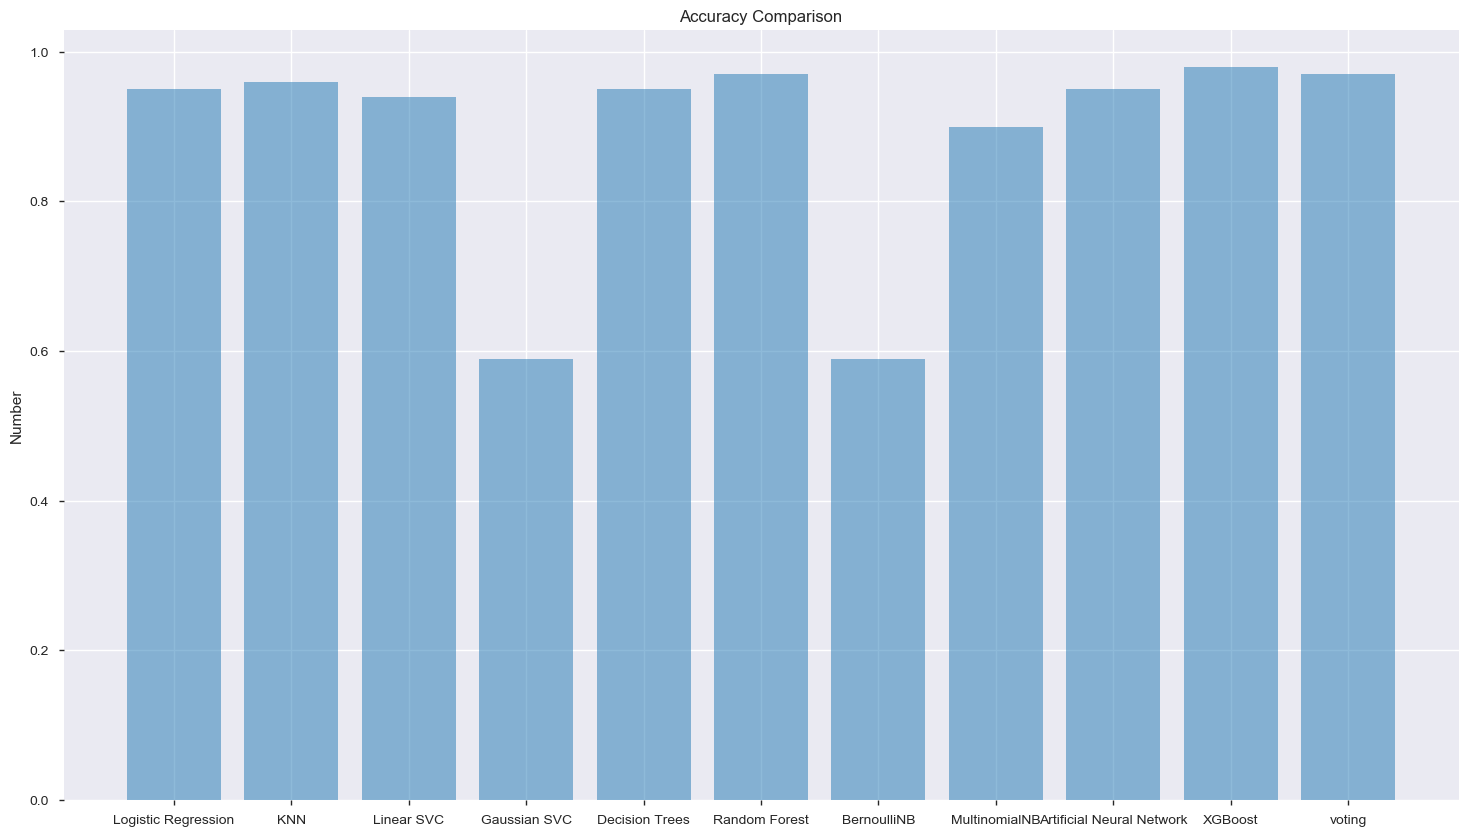

In [45]:
figure = plt.figure(figsize=(18, 10))
# Visualizing the results
objects = ['Logistic Regression',
           'KNN', 
           'Linear SVC', 
           'Gaussian SVC', 
           'Decision Trees', 
           'Random Forest', 
           'BernoulliNB', 
           'MultinomialNB',
           'Artificial Neural Network',
            'XGBoost',
            'voting']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[logits_acc,kacc,lsvcacc,ksvcaccacc,dtacc,rmacc,bncacc,mulacc, ann,xgb_acc,eclf_acc],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Accuracy Comparison')